In [1]:
import distribution_test as dt
import numpy as np
import pandas as pd

In [2]:
with open('../../postprocessing/representation.npy', 'rb') as f:
    rep = np.load(f)
    
df = pd.read_csv('../../dataset/m_test.csv')
print(df.columns.values)

['object_id' 'photoz' 'petroR90_r' 'r_cmodel_mag_ge' 'g_cmodel_mag_ge'
 'i_cmodel_mag_ge' 'z_cmodel_mag_ge' 'image_path' 'petro_half_light'
 'petro_90_light' 'dataset' 'snapshot_id' 'subhalo_id'
 'root_descendant_id' 'lookback' 'z' 'stellar_age_2rhalf_lumw'
 'fraction_disk_stars' 'stellar_mass' 'mass_in_rad' 'mass_exsitu'
 'half_mass_rad_physical' 'snap_num_last_maj_merger'
 'mass_last_maj_merger' 'mean_merger_lookback_time'
 'mean_merger_mass_ratio' 'color' 'i_band_mag_dust_apparent' 'mass'
 'lookback_time_last_maj_merger' 'exsitu']


In [3]:
indices_HSC = np.argwhere((df['dataset'] == 'HSC').to_numpy())[:,0]
indices_TNG100 = np.argwhere((df['dataset'] == 'HSC_TNG100').to_numpy())[:,0]

#first_rep = rep[0]
#first_df = df.iloc[0]

#print(first_rep)
#print(first_df)

np.random.shuffle(indices_HSC)
np.random.shuffle(indices_TNG100)

split_indices_HSC = np.array_split(indices_HSC, 2)
split_indices_TNG100 = np.array_split(indices_TNG100, 2)

x_list = [rep[split_indices_HSC[0]], rep[split_indices_HSC[1]], rep[split_indices_TNG100[0]], rep[split_indices_TNG100[1]]]
df_list = [df.iloc[split_indices_HSC[0]], df.iloc[split_indices_HSC[1]], df.iloc[split_indices_TNG100[0]], df.iloc[split_indices_TNG100[1]]]

x_list, df_list = dt.DistributionTest.reshape_inputs(x_list,df_list)
rep_HSC_0 = x_list[0]
rep_HSC_1 = x_list[1]
rep_TNG100_0 = x_list[2]
rep_TNG100_1 = x_list[3]
df_HSC_0 = df_list[0]
df_HSC_1 = df_list[1]
df_TNG100_0 = df_list[2]
df_TNG100_1 = df_list[3]

#print(np.sum(df_HSC_1['object_id'] == 40168200599522096.0))
#print(rep_HSC_1[df_HSC_1['object_id'] == 40168200599522096.0])

assert rep_HSC_0.shape[0] == len(df_HSC_0)
assert rep_HSC_1.shape[0] == len(df_HSC_1)
assert rep_TNG100_0.shape[0] == len(df_TNG100_0)
assert rep_TNG100_1.shape[0] == len(df_TNG100_1)

In [4]:
mndd = dt.MeanNormalizedNeighborDistance(rep_TNG100_0, n_neighbor=8, p=1)
measure_HSC = mndd.get_normalized_neighbor_distances(rep_HSC_0)
measure_TNG = mndd.get_normalized_neighbor_distances(rep_TNG100_1)

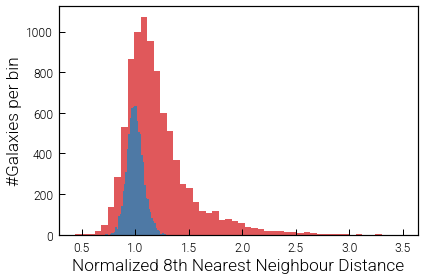

In [5]:
import matplotlib.pyplot as plt

plt.hist(measure_HSC, bins=50)
plt.hist(measure_TNG, bins=50)
plt.xlabel('Normalized 8th Nearest Neighbour Distance')
plt.ylabel('#Galaxies per bin')
plt.show()

max_HSC = np.max(measure_HSC)
min_HSC = np.min(measure_HSC)

mean_TNG = np.mean(measure_TNG)
std_TNG = np.std(measure_TNG)
lower_TNG = mean_TNG - std_TNG
upper_TNG = mean_TNG + std_TNG

[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8703   NaN
8704   NaN
8705   NaN
8706   NaN
8707   NaN
Name: object_id, Length: 8708, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8703   NaN
8704   NaN
8705   NaN
8706   NaN
8707   NaN
Name: photoz, Length: 8708, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8703   NaN
8704   NaN
8705   NaN
8706   NaN
8707   NaN
Name: petroR90_r, Length: 8708, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8703   NaN
8704   NaN
8705   NaN
8706   NaN
8707   NaN
Name: r_cmodel_mag_ge, Length: 8708, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8703   NaN
8704   NaN
8705   NaN
8706   NaN
8707   NaN
Name: g_cmodel_mag_ge, Length: 8708, dtype: float64] contains non-finite values.
[0   

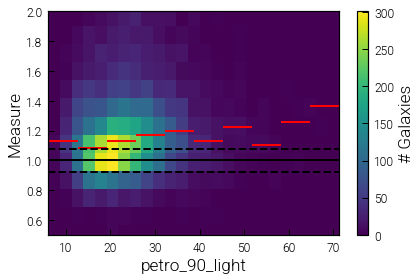

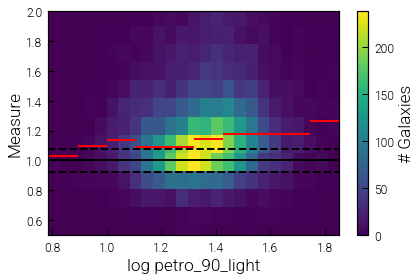

ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


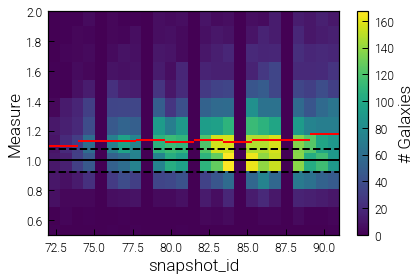

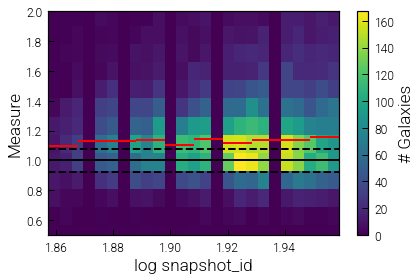

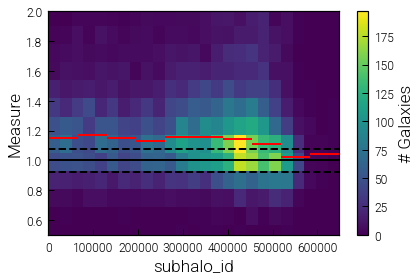

/u/leisert/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


[0       5.679304
1       5.704348
2       5.669718
3       5.629573
4       5.468724
          ...   
8703    5.709080
8704    1.380211
8705    5.232020
8706    5.377712
8707    5.503603
Name: subhalo_id, Length: 8708, dtype: float64] contains non-finite values.


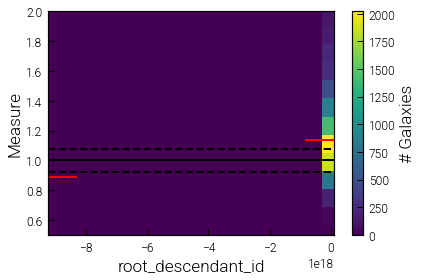

[0       16.845098
1       16.903091
2       16.903090
3       16.845098
4       16.698970
          ...    
8703    16.903090
8704    16.000000
8705    16.477121
8706    16.301030
8707    16.845098
Name: root_descendant_id, Length: 8708, dtype: float64] contains non-finite values.


/u/leisert/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


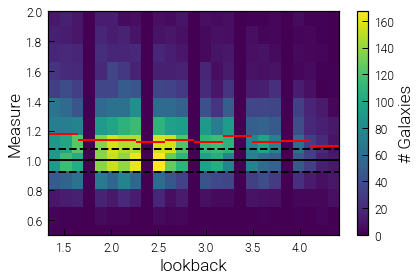

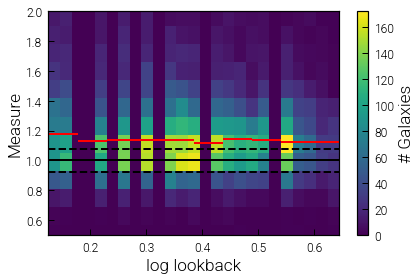

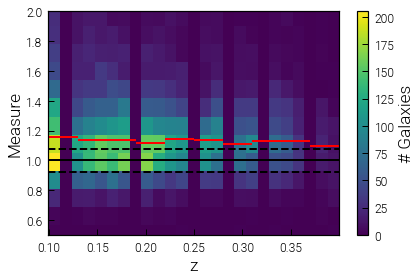

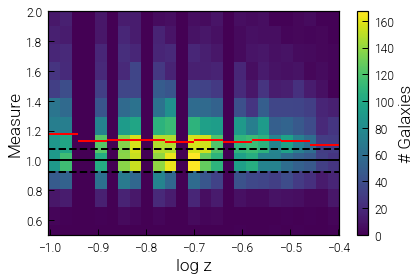

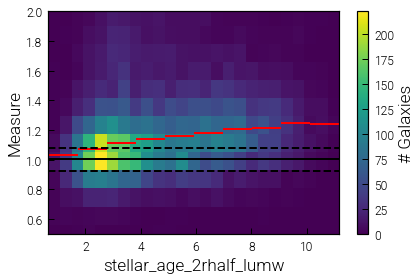

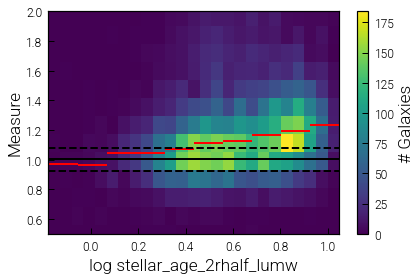

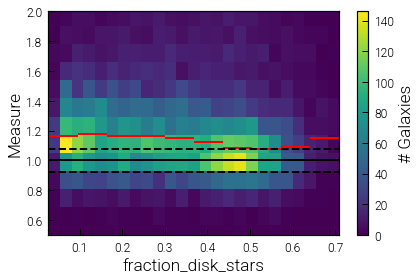

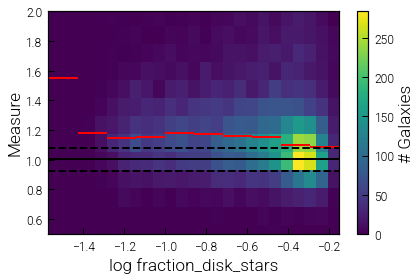

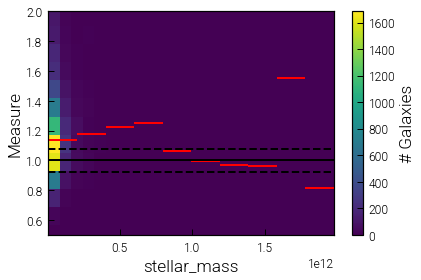

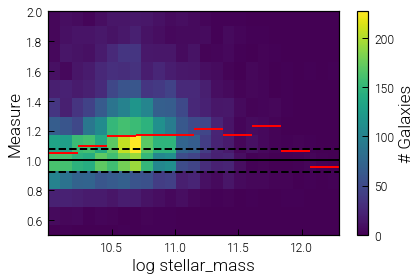

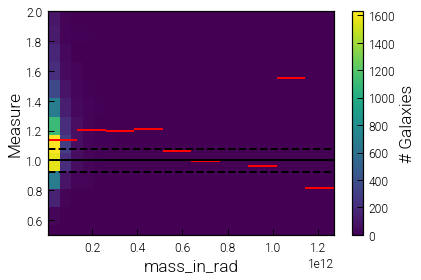

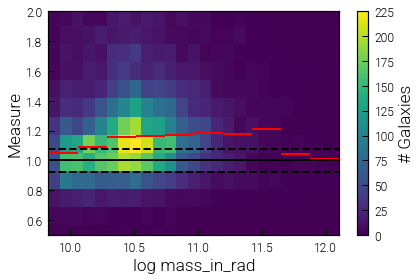

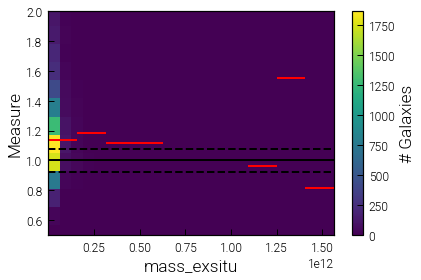

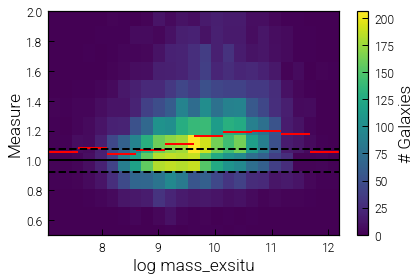

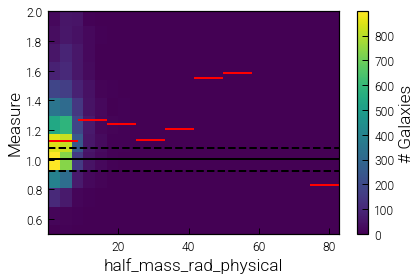

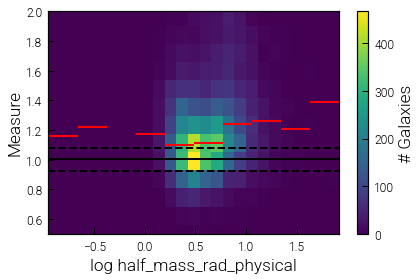

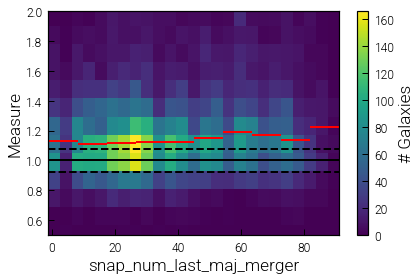

[0       1.755875
1       1.662758
2       1.414973
3       1.869232
4       1.505150
          ...   
8703    1.875061
8704    1.662758
8705    1.544068
8706    1.397940
8707    1.681241
Name: snap_num_last_maj_merger, Length: 8708, dtype: float64] contains non-finite values.


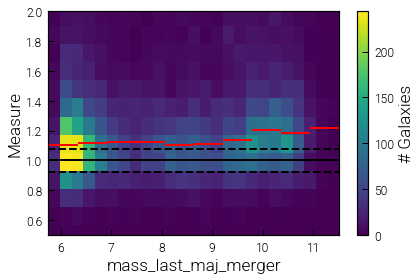

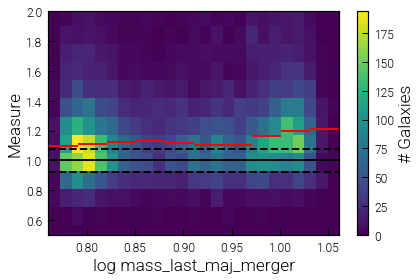

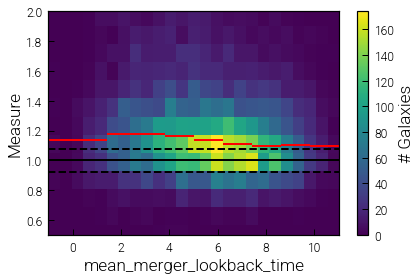

[0       0.543665
1       0.834989
2       0.852473
3       0.402258
4       0.785133
          ...   
8703    0.282238
8704    0.932106
8705    0.796831
8706    0.758576
8707    0.570122
Name: mean_merger_lookback_time, Length: 8708, dtype: float64] contains non-finite values.


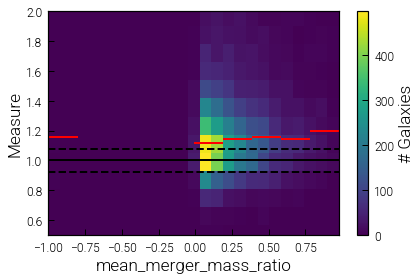

[0      -1.328615
1      -0.909965
2      -1.324812
3      -0.767565
4      -0.678222
          ...   
8703   -0.413922
8704   -0.791637
8705   -0.581576
8706   -0.955082
8707   -0.360545
Name: mean_merger_mass_ratio, Length: 8708, dtype: float64] contains non-finite values.


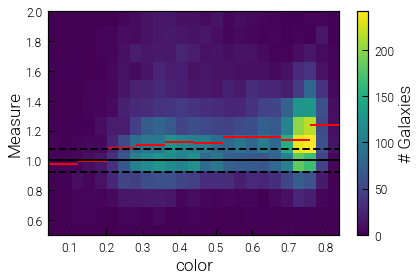

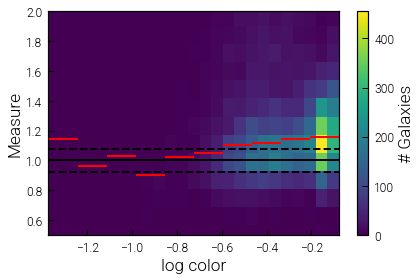

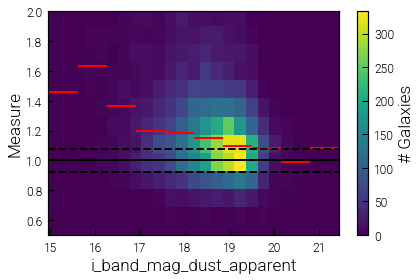

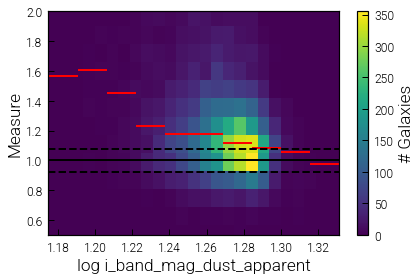

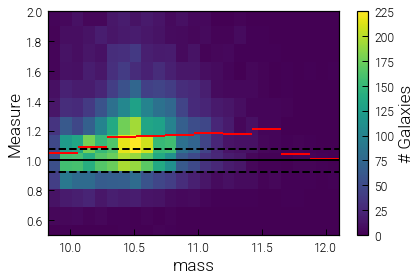

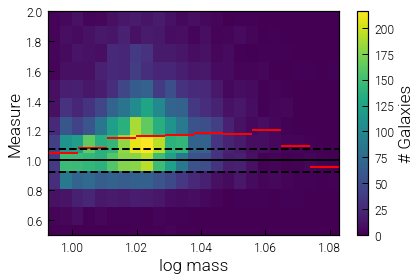

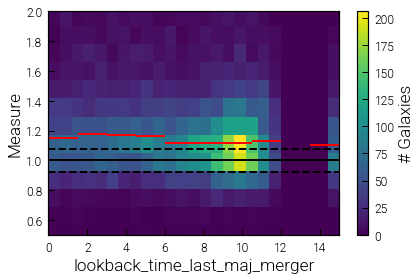

[0       0.694845
1       0.815189
2       0.967053
3       0.322137
4       0.903486
          ...   
8703    0.254551
8704    0.767023
8705    0.841369
8706    0.977130
8707    0.617694
Name: lookback_time_last_maj_merger, Length: 8708, dtype: float64] contains non-finite values.


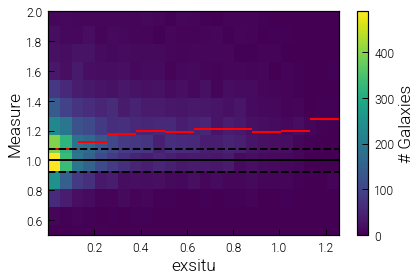

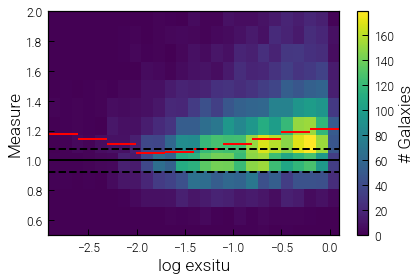

In [6]:
from scipy import stats

for label in df.columns.values:
    try:
        
        bin_statistic, bin_edges, binnumber = stats.binned_statistic(df_TNG100_0[label], measure_HSC, statistic='median', bins=10)
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        
        plt.hist2d(df_TNG100_0[label], measure_HSC, bins=25)
        plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='r', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [mean_TNG, mean_TNG], 'k', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [lower_TNG, lower_TNG], 'k--', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [upper_TNG, upper_TNG], 'k--', lw=2)
        plt.colorbar(label='# Galaxies')
        plt.xlabel(label)
        plt.ylabel('Measure')
        plt.ylim(0.5, 2)
        plt.show()
        
        bin_statistic, bin_edges, binnumber = stats.binned_statistic(np.log10(df_TNG100_0[label]), measure_HSC, statistic='median', bins=10)
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        
        plt.hist2d(np.log10(df_TNG100_0[label]), measure_HSC, bins=25)
        plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='r', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [mean_TNG, mean_TNG], 'k', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [lower_TNG, lower_TNG], 'k--', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [upper_TNG, upper_TNG], 'k--', lw=2)
        plt.colorbar(label='# Galaxies')
        plt.xlabel('log ' + label)
        plt.ylabel('Measure')
        plt.ylim(0.5, 2)
        plt.show()
        
    except Exception as e:
        print(e)

from scipy import stats

for label in df.columns.values:
    try:
        bin_statistic, bin_edges, binnumber = stats.binned_statistic(df_TNG100_0[label], measure_HSC, statistic='mean', bins=10)
        
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        
        plt.title(label)
        plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='g', lw=2)
        #plt.ylim(0,0.4)
        plt.show()
        
    except:
        pass

In [7]:
q = np.arange(0.0,1,0.25)
quantiles = np.quantile(measure_HSC, q)
classes = np.digitize(measure_HSC, quantiles)

<AxesSubplot:xlabel='mass', ylabel='classes'>

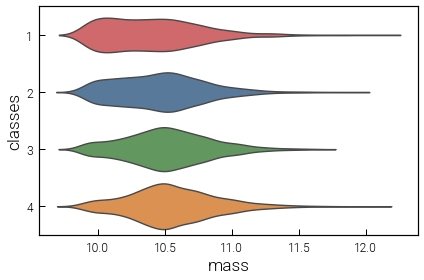

In [8]:
import seaborn as sns
d = {'classes': classes, 'deviations': measure_HSC, 'mass': df_TNG100_0['mass'], 'z': df_TNG100_0['z'], 'color': df_TNG100_0['color'], 'fraction_disk_stars': df_TNG100_0['fraction_disk_stars'], 'petro_90_light': df_TNG100_0['petro_90_light']}
d = pd.DataFrame(d)
sns.violinplot(data=d, x="mass", y="classes", inner=None, orient='h', scale='area')

In [17]:
import umap

#Set seed
SEED = 0

#Plot a single UMAP of x with color c
def create_umap(x, n_neighbors=50, min_dist=0.1, n_components=2, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        densmap=False,
        random_state=SEED
    )
    model = fit.fit(x)
    
    return model

In [18]:
model = create_umap(rep, n_neighbors=100, min_dist=0.5)
u = model.transform(rep_TNG100_0)

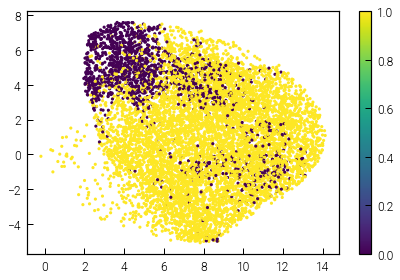

In [19]:
plt.scatter(u[:,0], u[:,1], s=10, c=measure_HSC<1.4)
plt.colorbar()
plt.show()

In [20]:
mndd = dt.MeanNormalizedNeighborDistance(rep_HSC_0, n_neighbor=8, p=1)
measure_TNG = mndd.get_normalized_neighbor_distances(rep_TNG100_0)

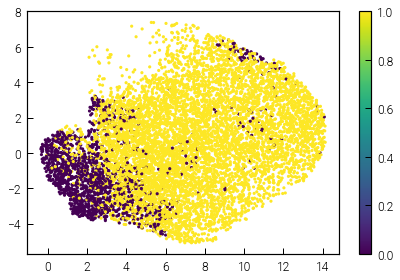

In [21]:
u = model.transform(rep_HSC_0)
plt.scatter(u[:,0], u[:,1], s=10, c=measure_TNG<1.4)
plt.colorbar()
plt.show()